In [14]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D ,Dropout, Flatten ,MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.models import load_model

In [15]:
datagentrain= ImageDataGenerator(rescale=1./255,horizontal_flip=True)
datagentest= ImageDataGenerator(rescale=1./255)
datagenval= ImageDataGenerator(rescale=1./255)

In [16]:
train=datagentrain.flow_from_directory('/home/user/Downloads/disease/cell_images/train'
                                       ,batch_size=32,target_size=(64,64),color_mode="grayscale")
test=datagentest.flow_from_directory('/home/user/Downloads/disease/cell_images/test'
                                     ,batch_size=8,target_size=(64,64),color_mode="grayscale")
val=datagenval.flow_from_directory('/home/user/Downloads/disease/cell_images/val'
                                     ,batch_size=8,target_size=(64,64),color_mode="grayscale")

Found 24326 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1232 images belonging to 2 classes.


In [17]:
class_labels=train.class_indices
class_labels={k:v for v,k in class_labels.items()}
classes = list(class_labels.values())
class_labels

{0: 'Parasitized', 1: 'Uninfected'}

Parasitized


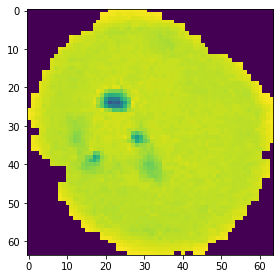

Parasitized


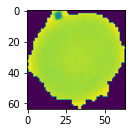

Uninfected


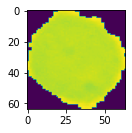

Parasitized


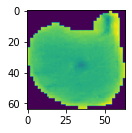

Uninfected


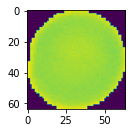

Uninfected


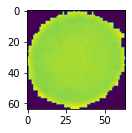

In [18]:
plt.figure(figsize=(15,10))
for(i,j) in [(2,1),(4,2),(8,3),(12,4),(15,5),(18,6)]:
    plt.subplot(2,3,j)
    print(classes[np.argmax(train[0][1][i])])
    plt.imshow(train[0][0][i])
    plt.show()

In [19]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,1),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))#model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [20]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy','AUC'])

In [21]:
callbacks=[ModelCheckpoint('malaria.h5',verbose=1,save_best_only=True),
          EarlyStopping(patience=10,monitor='val_loss')]

In [22]:
result=model.fit(train,validation_data=test,epochs=50,callbacks=callbacks)

Epoch 1/50
761/761 [==============================] - ETA: 0s - loss: 0.5004 - accuracy: 0.7199 - auc: 0.8207
Epoch 00001: val_loss improved from inf to 0.21359, saving model to malaria.h5
761/761 [==============================] - 58s 76ms/step - loss: 0.5004 - accuracy: 0.7199 - auc: 0.8207 - val_loss: 0.2136 - val_accuracy: 0.9200 - val_auc: 0.9722
Epoch 2/50
761/761 [==============================] - ETA: 0s - loss: 0.1530 - accuracy: 0.9451 - auc: 0.9847
Epoch 00002: val_loss did not improve from 0.21359
761/761 [==============================] - 65s 86ms/step - loss: 0.1530 - accuracy: 0.9451 - auc: 0.9847 - val_loss: 0.2170 - val_accuracy: 0.9305 - val_auc: 0.9699
Epoch 3/50
761/761 [==============================] - ETA: 0s - loss: 0.1375 - accuracy: 0.9518 - auc: 0.9873
Epoch 00003: val_loss improved from 0.21359 to 0.20158, saving model to malaria.h5
761/761 [==============================] - 66s 86ms/step - loss: 0.1375 - accuracy: 0.9518 - auc: 0.9873 - val_loss: 0.2016 - v

In [23]:
model=load_model("malaria.h5")

In [24]:
model.evaluate(test)

250/250 [==============================] - 3s 11ms/step - loss: 0.1665 - accuracy: 0.9380 - auc_1: 0.9831


[0.16652120649814606, 0.9380000233650208, 0.9830519556999207]

In [25]:
model.evaluate(val)

154/154 [==============================] - 2s 11ms/step - loss: 0.1986 - accuracy: 0.9310 - auc_1: 0.9767


[0.19857963919639587, 0.9310064911842346, 0.976670503616333]